## **Problem Statement:**

### Predict *salary* based on the *experience*

#### "The scenario is that an HR officer at company, to give the best salary for a candiate with 4.5 years of experience"

## 1. Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Load the Data set

In [2]:
salary = pd.read_csv("Salary_Data.csv")

## 3. Basic information of data set

In [3]:
#check the shape(Rows*column) of data set
salary.shape

(30, 2)

In [4]:
#View data (First 5 observations)
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
#View data (Last 5 observations)
salary.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [6]:
#Checking the data type
salary.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [7]:
#Describing the data set statistically
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
#Information about data set
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## 4. Data Cleaning

In [9]:
#Drop Duplicates
salary = salary.drop_duplicates()

In [10]:
salary.shape  

(30, 2)

- From this its observed that there is no any duplicate data in the given data set.

In [11]:
#Checking for NULL values
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

- It is observed that there is no even NULL values

## 5. Createing Dependent(y) & Independent(X) Variables

In [12]:
target = "Salary"

#Seperate object for target
y = salary[target]

X = salary.drop(target, axis = 1)

In [13]:
X.shape

(30, 1)

In [14]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [15]:
y.shape

(30,)

In [16]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

## 6. Data Visualization 

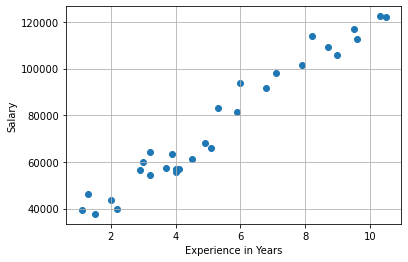

In [17]:
plt.scatter(X,y)
plt.xlabel('Experience in Years')
plt.ylabel('Salary')
plt.grid()
plt.show()

## 7. Split data set to Train & Test

- We are splitting data into 80 - 20 ratio, i.e; 80% of data to train the model and 20% to test the model

In [18]:
from sklearn.model_selection import train_test_split        ##Library used for splitting the data for test and train

In [19]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 0)

In [20]:
X_train.shape, y_train.shape

((24, 1), (24,))

In [21]:
X_test.shape, y_test.shape

((6, 1), (6,))

## 8. Applying Linear Regression Model on Train Data set

- Basic Regression model equation **y = m*X+c**
- Where, y = slope
         m = Co-efficient
         c = Intercept

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg = LinearRegression()

In [24]:
reg.fit(X_train, y_train)

LinearRegression()

## 9. Parameters 

In [31]:
reg.intercept_

print('Intercept of Regression (c) : ', reg.intercept_)

Intercept of Regression (c) :  26780.099150628186


In [32]:
reg.coef_

print('Coefficient of Regression (m) : ', reg.coef_)

Coefficient of Regression (m) :  [9312.57512673]


## 10. Applying Model on Test Data set  

- To predict the "y" values of test data

In [33]:
y_predict = reg.predict(X_test)

In [34]:
y_predict

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

## 11. To compare actual values of "y" with predicted values

In [28]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Variance': y_test-y_predict})

In [29]:
df

,Actual,Predicted,Variance
2,37731.0,40748.961841,-3017.961841
28,122391.0,122699.622956,-308.622956
13,57081.0,64961.657170,-7880.657170
10,63218.0,63099.142145,118.857855
26,116969.0,115249.562855,1719.437145
24,109431.0,107799.502753,1631.497247


In [30]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## 12. Prediction

In [35]:
#Predicting salary of a candidate with 4.5 years of experience

p = np.array([4.5]).reshape(-1,1)

reg.predict(p)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([68686.68722091])

In [36]:
# y = m*X + c

9312.57512673*4.5+26780.099150628186

68686.68722091318

#### The actual salary fixed for a person with 4.5 Years of experiance is 61,111.00/- but the best salary that can be given is 68,686.68/-

### Evaluation of Regression Algorithms

In [62]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_predict)*100

print("R^2 = ", score)

R^2 =  98.8169515729126


In [51]:
from sklearn import metrics

print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,y_predict))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Squre Error: ", np.sqrt(metrics.mean_squared_error(y_test,y_predict)))  

Mean Absolute Error :  2446.1723690465064
Mean Squared Error :  12823412.298126562
Root Mean Squre Error:  3580.979237321345
